<h2> Cluster Analysis : Customer segmentation </h2>

In [105]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

sns.set()

<h3> Challenge Question 1 </h3>

Import the <b> data </b> file into a dataframe <b> df </b>

In [106]:
df = pd.read_csv('Lab8_cluster_data.csv')
df

,CustomerID,Gender,Age,Annual_income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [107]:
#Check the data information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



<h3> Challenge Question 2 </h3>

Remove the NA values  <b> dropna()</b>

In [108]:
#To remove the NA values sing dropna()
df = df.dropna() #insert code here

In [109]:
df.describe()

,CustomerID,Age,Annual_income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [110]:
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 200


<h3> Challenge Question 3 </h3>

Print the dataset <b> df </b> by sorting the Spending_Score in descending order

In [111]:
#print the dataset by sorting the spending_score in descending order

df_sorted = df.sort_values(by='Spending_Score', ascending=False)
df_sorted

,CustomerID,Gender,Age,Annual_income,Spending_Score
11,12,Female,35,19,99
19,20,Female,35,23,98
145,146,Male,28,77,97
185,186,Male,30,99,97
127,128,Male,40,71,95
...,...,...,...,...,...
30,31,Male,60,30,4
32,33,Male,53,33,4
8,9,Male,64,19,3
158,159,Male,34,78,1


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual_income'}>,
        <AxesSubplot:title={'center':'Spending_Score'}>]], dtype=object)

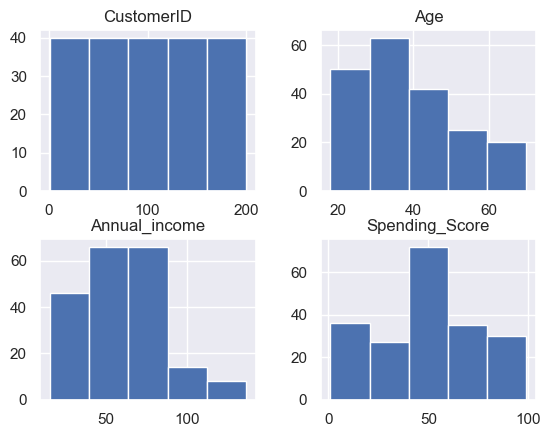

In [112]:
df_sorted.hist(bins=5)

### Visualize the data and understand the indicators
One of the first things we should do is understand our task. As mentioned in the introduction, our goal is to build an algorithm that to cluster the customers. As such, the first thing we should do is observe customers. We will find that this data consists of 200 records of customers.

<AxesSubplot:xlabel='Gender', ylabel='count'>

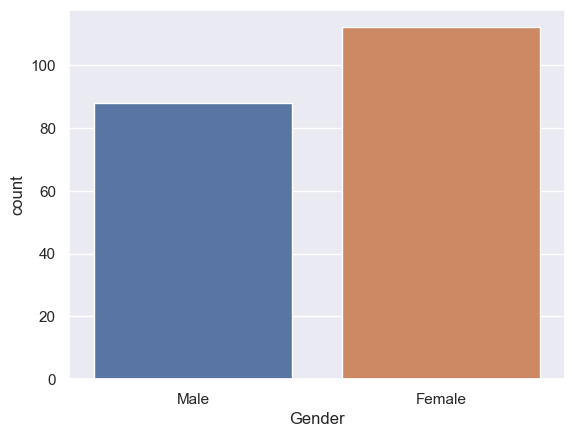

In [113]:
sns.countplot(x="Gender", data=df) # countplots are ways of visualizing counts in seaborn

<AxesSubplot:xlabel='Annual_income', ylabel='Age'>

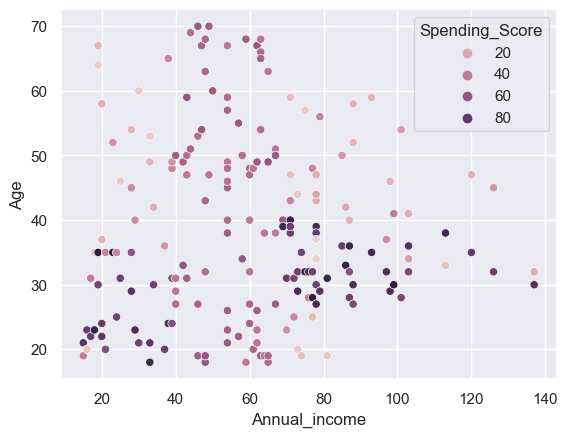

In [114]:
sns.scatterplot(data=df, x="Annual_income", y="Age", hue="Spending_Score")

<h2> Challenge Question 4 </h2>
 Apply pearsonr corelation to Annual income and Spending score

In [115]:
from scipy import stats
stats.pearsonr(df["Annual_income"], df["Spending_Score"])

#pearsonr correlation

PearsonRResult(statistic=0.009902848094037603, pvalue=0.8893134370274359)

<h1> K-means Custering</h1>

A simple K-Means Clustering model implemented in python. The class KMeans is imported from sklearn.cluster library. In order to find the optimal number of cluster for the dataset, the model was provided with different numbers of cluster ranging from 1 to 10. The 'k-means++' method to passed to the init argument to avoid the Random Initialization Trap. The max_iter and the n_init were passed with their default values.
The WCSS ( or Within Cluster Sum of Squares ) was caluated and plotted to find the optimal number of clusters. </br> The "Elbow Method" is used to find the optimal number of clusters. </br>


Located the Annual_income and Spending_Score  coloumns to find the clusters

In [116]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

First, we calculated WCSSS to find the optimal number of clusters and visualized the elbow method to find the number of clusters

In [117]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

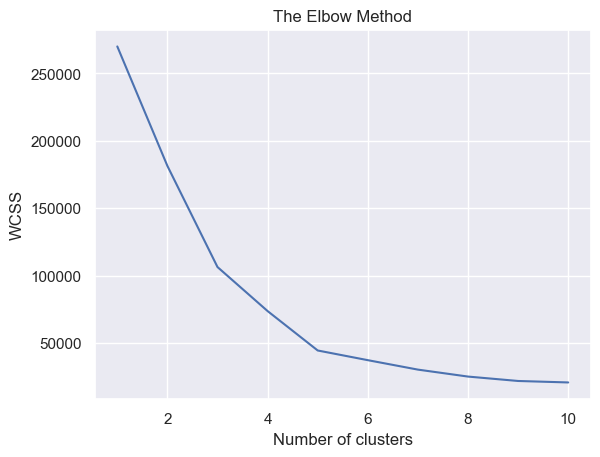

In [118]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)


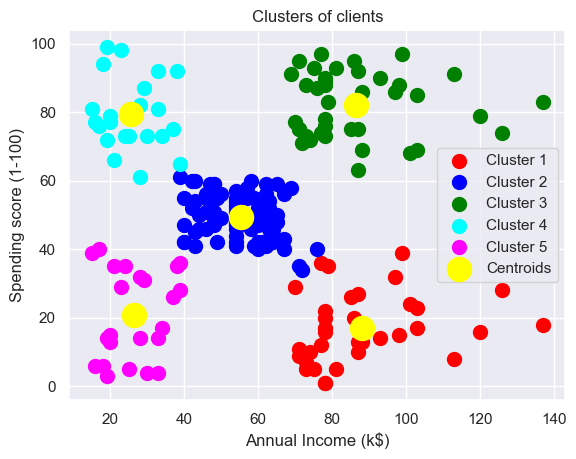

In [120]:
# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 100, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 100, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

<h2> Challenge Question 5 </h2>
Apply KMeans to the dataset with the three(3) clusters


In [121]:
# Applying KMeans to the dataset with 3 clusters

kmeans=KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)# Applying KMeans to the dataset with three clusters


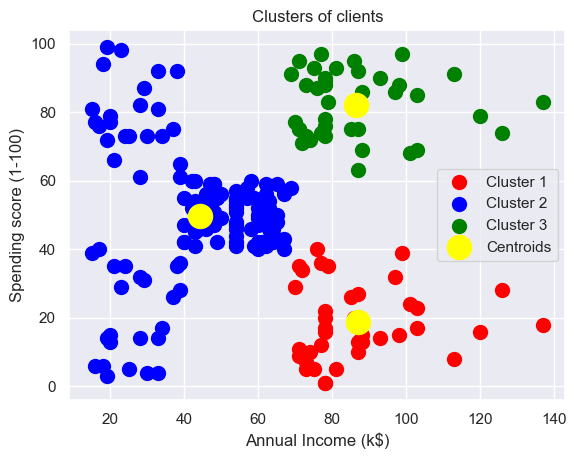

In [122]:
# Visualising the clusters
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 100, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 100, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 100, c='green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

<h2> References</h2>

https://github.com/mahesh147/KMeans-Clustering